In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [16]:
data = pd.read_csv('dados.csv')
data['Tempo'] = [float(x)*10**-6 for x in data['Tempo']]
data.head()

,Tempo,Velocidade RPM
0,0.000044,0.0
1,0.000472,0.0
2,0.000952,0.0
3,0.001444,0.0
4,0.001968,0.0


In [17]:
indices = np.arange(len(data['Tempo']))

In [18]:
tempo = data['Tempo']
resposta = data['Velocidade RPM']

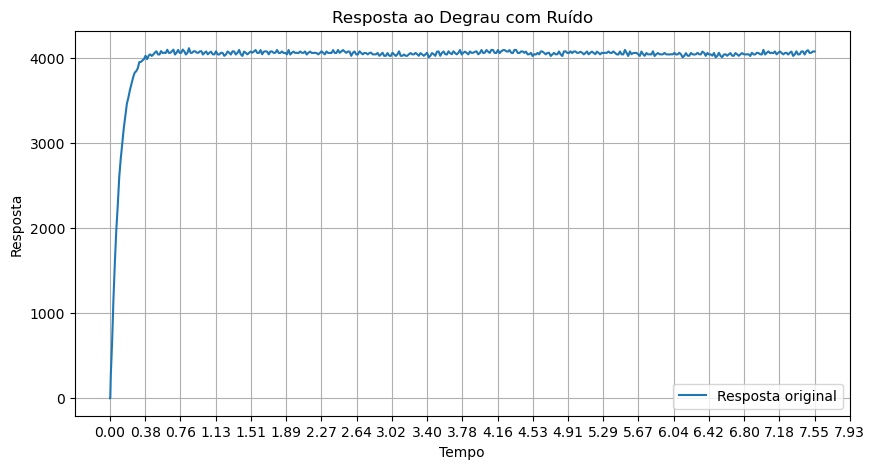

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(tempo, resposta, label='Resposta original')
plt.xlabel('Tempo')
plt.ylabel('Resposta')

plt.gca().xaxis.set_major_locator(MultipleLocator((tempo.max() - tempo.min()) / 20))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Resposta ao Degrau com Ruído')
plt.grid()
plt.legend()
plt.show()

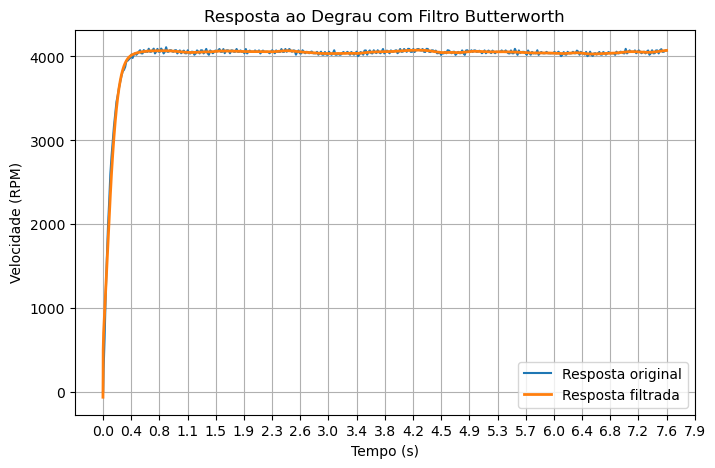

In [20]:
# Definir a frequência de corte e a ordem do filtro
freq_de_corte = 0.1  # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)

# Plotar a resposta filtrada
plt.figure(figsize=(8, 5))
plt.plot(tempo, resposta, label='Resposta original')
plt.plot(tempo, resposta_filtrada, label='Resposta filtrada', linewidth=2)
plt.gca().xaxis.set_major_locator(MultipleLocator((tempo.max() - tempo.min()) / 20))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (RPM)')
plt.title('Resposta ao Degrau com Filtro Butterworth')
plt.grid()
plt.legend()
plt.show()
